In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 5.0)
np.set_printoptions(suppress=True) # Don't print scietific numbers form

In [381]:
data = loadmat('data/ex5data1.mat')

In [382]:
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

In [383]:
def plot_dataset(x,y,xmin,xmax,ymin,ymax,xlabel,ylabel):
    plt.plot(x,y,'rx')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

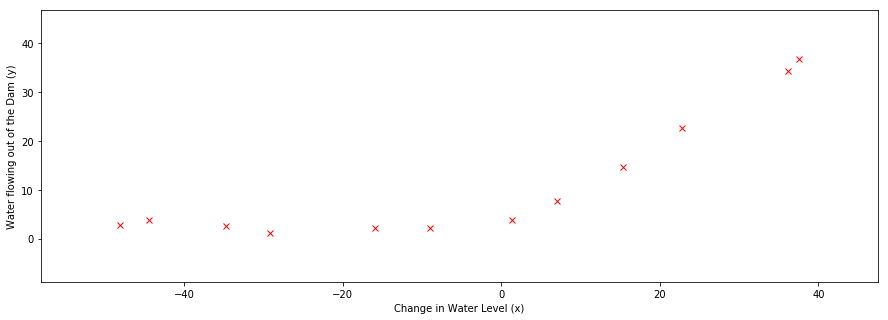

In [384]:
plot_dataset(X,y,X.min()-10,X.max()+10,y.min()-10,y.max()+10,'Change in Water Level (x)','Water flowing out of the Dam (y)')

In [385]:
def regularised_cost_function(theta,X,y,lmbda):
    theta = theta.reshape(X.shape[1],1)
    predicted_y = np.dot(X,theta)
    m = X.shape[0]
    theta_reg = np.r_[np.zeros((1,theta.shape[1])),theta[1:,:]]
    J = (1/(2*m))*np.sum(np.square(predicted_y - y)) + (lmbda/(2*m))*np.sum(np.square(theta[1:,:]))
    gradient = (1/m)*np.dot(X.T,(predicted_y - y)) + (lmbda/m)*theta_reg
    gradient = gradient.reshape(X.shape[1],)
    return (J,gradient)

In [386]:
initial_theta = np.ones((2,1))
lmbda = 1
X_matrix = np.c_[np.ones((X.shape[0],1)),X]
(J,grad) = regularised_cost_function(initial_theta,X_matrix,y,1)
print(J,grad)

303.99319222 [ -15.30301567  598.25074417]


In [387]:
def trainLinearRegression(X,y,lmbda):
    initial_theta = np.zeros( [X.shape[1], 1] )
    regression = minimize( fun = regularised_cost_function, x0 = initial_theta, 
              args = (X, y, lmbda), 
              method = 'CG', jac = True, options = {'maxiter' : 200} )
    return regression

In [388]:
regression = trainLinearRegression(X_matrix,y,lmbda)
print(regression)

     fun: 22.379541822940265
     jac: array([ 0., -0.])
 message: 'Optimization terminated successfully.'
    nfev: 5
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([ 13.08771416,   0.367742  ])


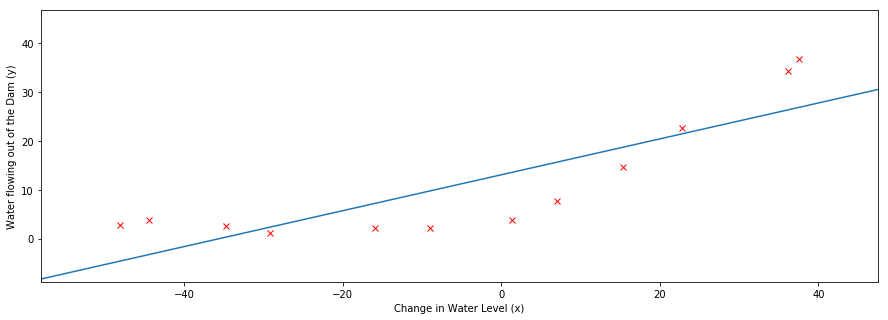

In [389]:
plot_dataset(X,y,X.min()-10,X.max()+10,y.min()-10,y.max()+10,'Change in Water Level (x)','Water flowing out of the Dam (y)')
x_intercept = [X.min() - 10,X.max() + 10]
theta_def = np.array(regression.x).reshape(2,1)
y_intercept = np.dot(np.c_[np.ones((2,1)),x_intercept],theta_def)
plt.plot(x_intercept,y_intercept)
# print(y_intercept)
# print(y)
# print(np.c_[np.ones((2,1)),x_intercept])
# plt.plot([x_min,x_max],[])

In [391]:
from IPython.core.display import display, HTML
display(HTML('<h1>Bias and Variance</h1>'))

In [392]:
def error_plot(X,y,xval,yval,lmbda):
      train_error = np.zeros((xval.shape[0],1))
      cv_error = np.zeros((xval.shape[0],1))
      for i in range(0,xval.shape[0]):
            x = X[0:i+1,:]
            regression = trainLinearRegression(x,y[0:i+1,:],lmbda)
            train_error[i] = regression.fun
            trained_theta = regression.x.reshape(x.shape[1],1)
            
#             X_matrix = np.c_[np.ones((xval.shape[0],1)),xval]
            predicted_y = np.dot( xval, trained_theta )
            cv_error[i] = np.sum(np.square( predicted_y - yval ))/(2*yval.shape[0])
        
      return (train_error,cv_error)



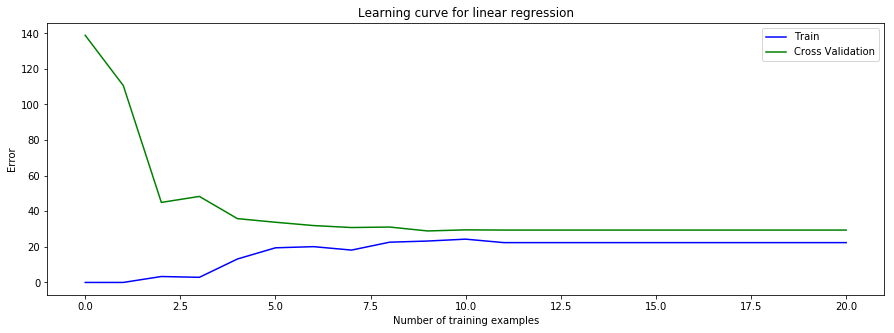

In [393]:
X = np.c_[np.ones((X.shape[0],1)),X]
Xval = np.c_[np.ones((Xval.shape[0],1)),Xval]
(train_error,cv_error) = error_plot(X,y,Xval,yval,1)
plt.plot(train_error,'-b', label = 'Train')
plt.plot(cv_error,'-g', label = 'Cross Validation' )
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.title('Learning curve for linear regression')
plt.show()

In [394]:
def  poly_features ( X, p ):
    X_poly = X.reshape(X.shape[0],1)
    for i in range(1, p):
        X_poly = np.c_[X_poly, np.power(X_poly[:,0], i + 1)]
    return X_poly

In [395]:
def  feature_normalize ( X ):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X,axis = 0)

    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

In [396]:
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

X_poly,mu,sigma = feature_normalize(poly_features(X,p))
X_matrix_poly = np.c_[np.ones((X_poly.shape[0],1)),X_poly]

xval_poly = poly_features(Xval,p)
xval_matrix_poly = np.c_[np.ones((xval_poly.shape[0],1)),(xval_poly - mu)/sigma]

xtest_poly = poly_features(Xtest,p)
xtest_matrix_poly = np.c_[np.ones((xtest_poly.shape[0],1)),(xtest_poly - mu)/sigma]

In [397]:
p = 8
lmbda = 0.0
regression = trainLinearRegression(X_matrix_poly,y,lmbda)
print(regression)
theta = regression.x.reshape(X_matrix_poly.shape[1],1)

     fun: 0.06820084265896366
     jac: array([ 0.00001762, -0.00019583, -0.00154941, -0.00064687,  0.00221312,
        0.00099017,  0.0001832 ,  0.00003485, -0.00072581])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 364
     nit: 200
    njev: 364
  status: 1
 success: False
       x: array([ 11.21760695,  10.60530425,  17.00119311,  14.11147285,
       -25.86190297, -29.1065597 ,  22.45281467,  19.69172364,  -4.2903955 ])


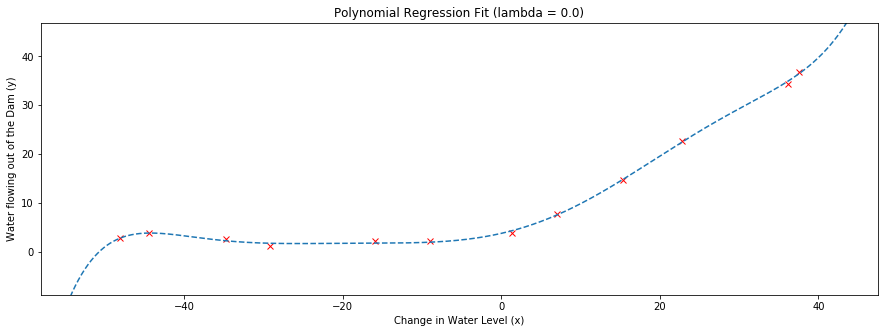

In [398]:
plot_dataset(X,y,X.min()-10,X.max()+10,y.min()-10,y.max()+10,'Change in Water Level (x)','Water flowing out of the Dam (y)')
x = np.arange( np.amin(X) - 15, np.amax(X) + 25, 0.05 )
x_poly = poly_features(x, p)
x_poly = np.c_[ np.ones(x_poly.shape[0]), (x_poly - mu)/sigma ]
plt.title(f'Polynomial Regression Fit (lambda = {lmbda})') # python 3.6
plt.plot( x, x_poly.dot(theta), '--' )

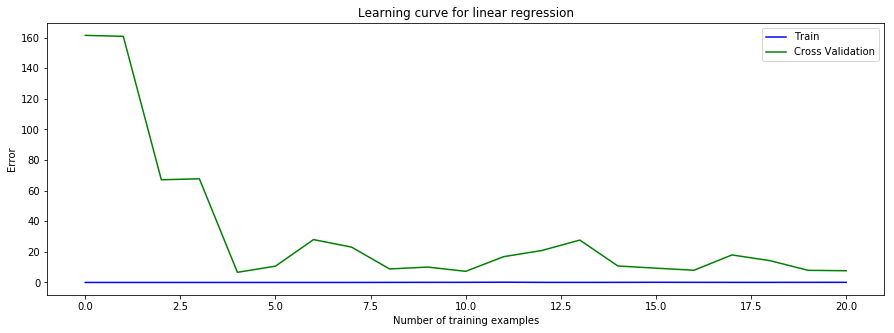

In [399]:
(train_error,cv_error) = error_plot(X_matrix_poly,y,xval_matrix_poly,yval,0)
plt.plot(train_error,'-b', label = 'Train')
plt.plot(cv_error,'-g', label = 'Cross Validation' )
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.title('Learning curve for linear regression')
plt.show()

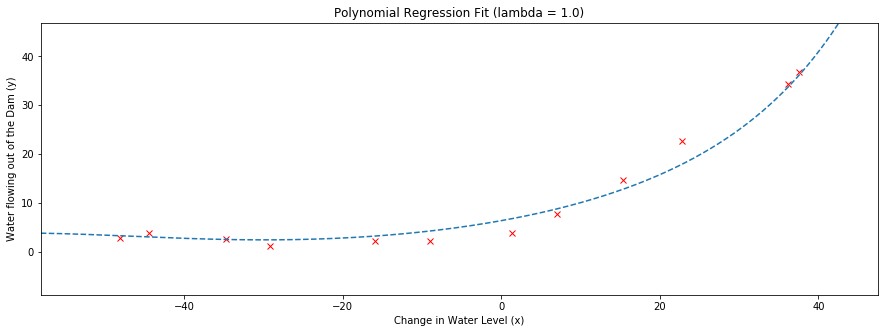

In [400]:
lmbda = 1.0
regression = trainLinearRegression(X_matrix_poly,y,lmbda)
theta = regression.x.reshape(X_matrix_poly.shape[1],1)
plot_dataset(X,y,X.min()-10,X.max()+10,y.min()-10,y.max()+10,'Change in Water Level (x)','Water flowing out of the Dam (y)')
x = np.arange( np.amin(X) - 15, np.amax(X) + 25, 0.05 )
x_poly = poly_features(x, p)
x_poly = np.c_[ np.ones(x_poly.shape[0]), (x_poly - mu)/sigma ]
plt.title(f'Polynomial Regression Fit (lambda = {lmbda})') # python 3.6
plt.plot( x, x_poly.dot(theta), '--' )

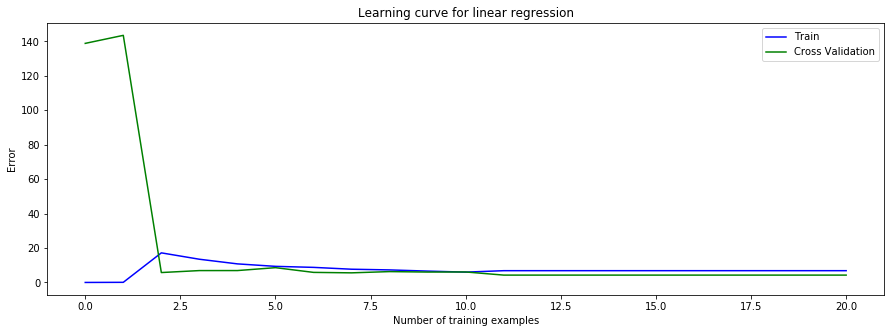

In [401]:
(train_error,cv_error) = error_plot(X_matrix_poly,y,xval_matrix_poly,yval,1.00)
plt.plot(train_error,'-b', label = 'Train')
plt.plot(cv_error,'-g', label = 'Cross Validation' )
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.title('Learning curve for linear regression')
plt.show()

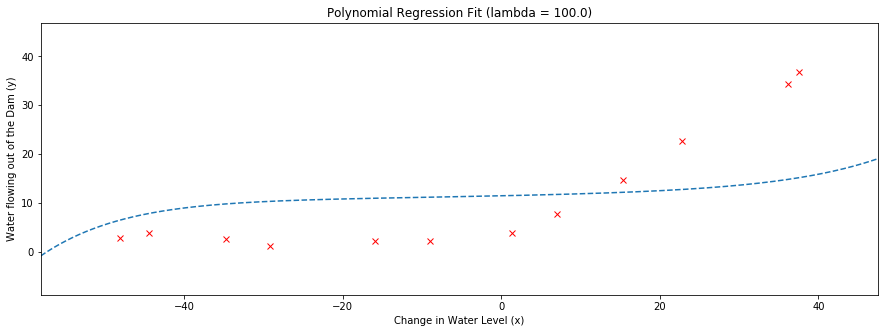

In [376]:
lmbda = 100.0
regression = trainLinearRegression(X_matrix_poly,y,lmbda)
theta = regression.x.reshape(X_matrix_poly.shape[1],1)
plot_dataset(X,y,X.min()-10,X.max()+10,y.min()-10,y.max()+10,'Change in Water Level (x)','Water flowing out of the Dam (y)')
x = np.arange( np.amin(X) - 15, np.amax(X) + 25, 0.05 )
x_poly = poly_features(x, p)
x_poly = np.c_[ np.ones(x_poly.shape[0]), (x_poly - mu)/sigma ]
plt.title(f'Polynomial Regression Fit (lambda = {lmbda})') # python 3.6
plt.plot( x, x_poly.dot(theta), '--' )

In [377]:
# def validation_curve( X, y, xval, yval ):
#     lmda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
#     train_error = np.zeros((lmda_vec.shape[0],))
#     cv_error = np.zeros((lmda_vec.shape[0],))
#     for i in range(0,lmda_vec.shape[0]):
#         X_matrix = np.c_[np.ones((X.shape[0],1)),X]
#         regression = trainLinearRegression(X_matrix,y,lmda_vec[i])
#         train_error[i] = regression.fun
#         trained_theta = regression.x.reshape(X_matrix.shape[1],1)
#         X_matrix = np.c_[np.ones((xval.shape[0],1)),xval]
#         predicted_y = np.dot( X_matrix, trained_theta )
#         cv_error[i] = np.sum(np.square( predicted_y - yval ))/(2*yval.shape[0])
#     return (lmda_vec,train_error,cv_error)

In [378]:
def  validation_curve ( X, y, Xval, yval ):
    lmda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    m_train = X.shape[0]
    m_val = Xval.shape[0]
    error_train = np.zeros(lmda_vec.size)
    error_val   = np.zeros(lmda_vec.size)
    for i in range(lmda_vec.size):
        lmda = lmda_vec[i]
        theta_trained = trainLinearRegression( X, y, lmda ).x.reshape(X.shape[1],1)
        h_train = np.dot( X, theta_trained )
        h_val = np.dot( Xval, theta_trained )
        error_train[i] = np.sum(np.square( h_train - y ))/(2*(m_train))
        error_val[i] = np.sum(np.square( h_val - yval ))/(2*m_val)
    return (lmda_vec, error_train, error_val)

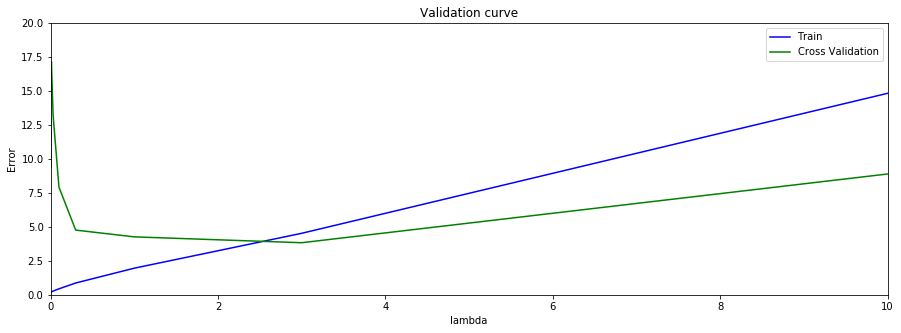

In [379]:
lmda_vec,error_train,error_val = validation_curve( X_matrix_poly, y, xval_matrix_poly, yval )
plt.plot( lmda_vec, error_train, '-b', label = 'Train' )
plt.plot( lmda_vec, error_val, '-g', label = 'Cross Validation' )
plt.axis([0, np.amax(lmda_vec), 0, 20])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.legend()
plt.title('Validation curve')
plt.show()